# key words
- regressor: LinearRegression, Ridge, RidgeCV
- metrics: mean_absolute_error, mean_squared_error, make_scorer

RidgeCV, best alpha = 0.042312, alpha_index = 15
RidgeCV MSE, best alpha = 0.042312, alpha_index = 0
RidgeCV MAE, best alpha = 0.005000, alpha_index = 0


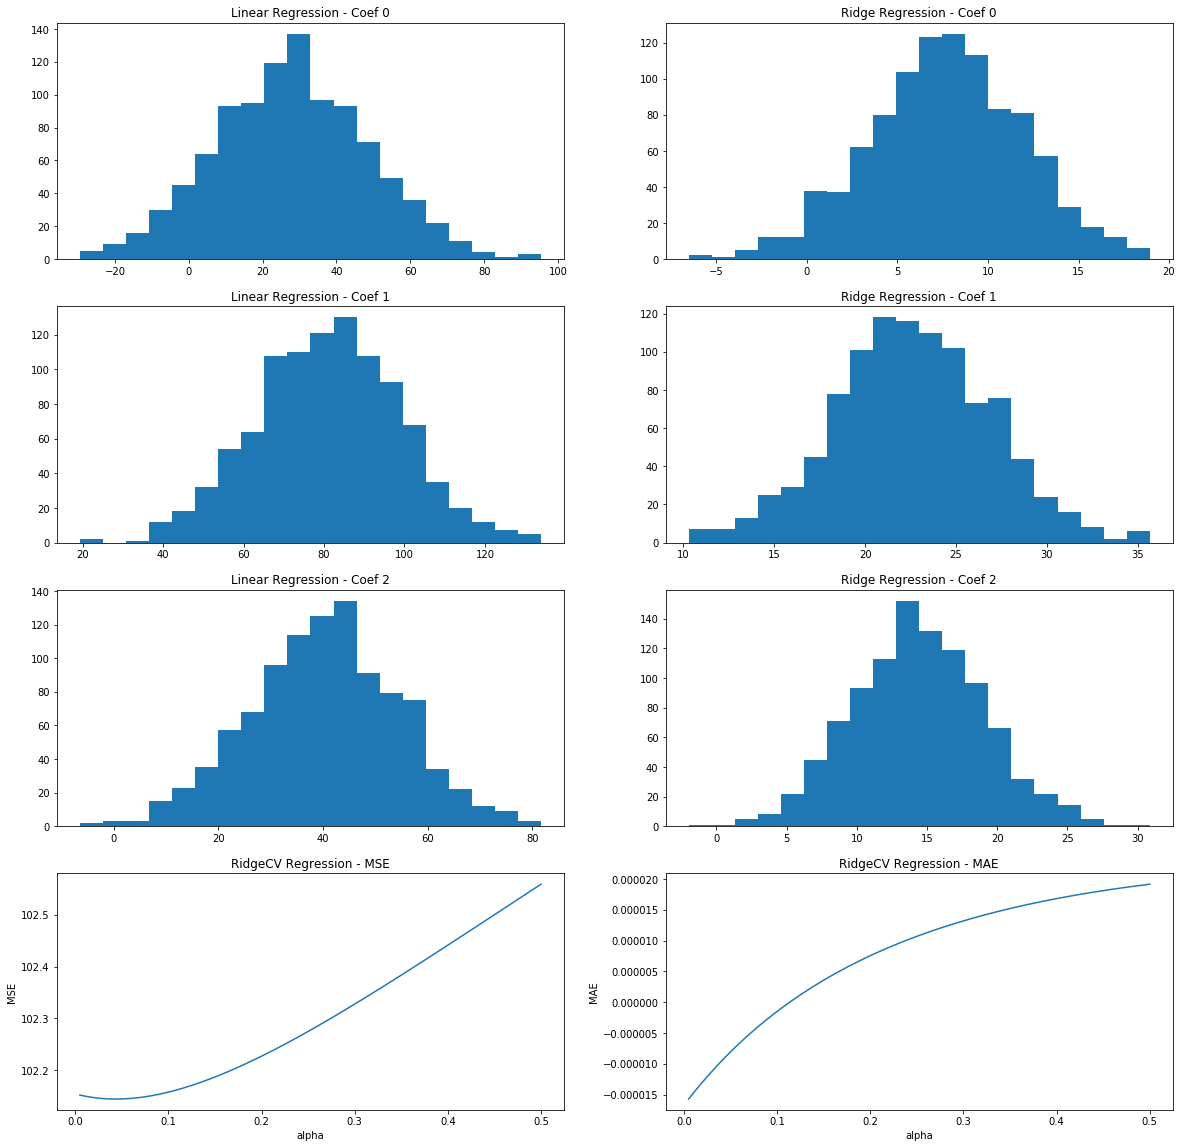

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV

from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error


X_reg, y_reg = datasets.make_regression(n_samples=2000, n_features=3, effective_rank=2, noise=10)

n_bootstraps = 1000
len_X_reg = len(X_reg)
subsample_size = np.int(0.5 * len_X_reg)
subsample_idx = lambda: np.random.choice(np.arange(0, len_X_reg), size=subsample_size)

# lr
lr = LinearRegression()
coefs_reg = np.ones((n_bootstraps, 3))
for i in range(n_bootstraps):
    idx_reg_sub = subsample_idx()
    X_reg_sub = X_reg[idx_reg_sub]
    y_reg_sub = y_reg[idx_reg_sub]
    lr.fit(X_reg_sub, y_reg_sub)
    coefs_reg[i][0] = lr.coef_[0]
    coefs_reg[i][1] = lr.coef_[1]
    coefs_reg[i][2] = lr.coef_[2]

# ridge
ridge = Ridge()
coefs_ridge = np.ones((n_bootstraps, 3))
for i in range(n_bootstraps):
    idx_reg_sub = subsample_idx()
    X_reg_sub = X_reg[idx_reg_sub]
    y_reg_sub = y_reg[idx_reg_sub]
    ridge.fit(X_reg_sub, y_reg_sub)
    coefs_ridge[i][0] = ridge.coef_[0]
    coefs_ridge[i][1] = ridge.coef_[1]
    coefs_ridge[i][2] = ridge.coef_[2]

# ridge cv
alphas = np.linspace(0.005, 0.5, 200)
# cv=None -> LOOCV
# default scorer, implicitly MSE
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_reg, y_reg)
# show the best alpha choice after fitting the regression
print("RidgeCV, best alpha = %.6f, alpha_index = %d" % (ridge_cv.alpha_, ridge_cv.cv_values_.mean(axis=0).argmin()))

# customize scorer, explicitly MSE for default config
MSE_scorer = make_scorer(mean_squared_error, greater_is_better=False)
ridge_cv_MSE = RidgeCV(alphas=alphas, store_cv_values=True, scoring=MSE_scorer)
ridge_cv_MSE.fit(X_reg, y_reg)
print("RidgeCV MSE, best alpha = %.6f, alpha_index = %d" % (ridge_cv_MSE.alpha_, ridge_cv_MSE.cv_values_.mean(axis=0).argmin()))

# try MAE
MAE_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
ridge_cv_MAE = RidgeCV(alphas=alphas, store_cv_values=True, scoring=MAE_scorer)
ridge_cv_MAE.fit(X_reg, y_reg)
print("RidgeCV MAE, best alpha = %.6f, alpha_index = %d" % (ridge_cv_MAE.alpha_, ridge_cv_MAE.cv_values_.mean(axis=0).argmin()))

# plot
plt.figure(figsize=(20, 20))
plt.tight_layout()

plt.subplot(421, title="Linear Regression - Coef 0")
plt.hist(coefs_reg[:, 0], bins=20)

plt.subplot(422, title="Ridge Regression - Coef 0")
plt.hist(coefs_ridge[:, 0], bins=20)

plt.subplot(423, title="Linear Regression - Coef 1")
plt.hist(coefs_reg[:, 1], bins=20)

plt.subplot(424, title="Ridge Regression - Coef 1")
plt.hist(coefs_ridge[:, 1], bins=20)

plt.subplot(425, title="Linear Regression - Coef 2")
plt.hist(coefs_reg[:, 2], bins=20)

plt.subplot(426, title="Ridge Regression - Coef 2")
plt.hist(coefs_ridge[:, 2], bins=20)

plt.subplot(427, title="RidgeCV Regression - MSE", xlabel="alpha", ylabel="MSE")
plt.plot(alphas, ridge_cv.cv_values_.mean(axis=0))

plt.subplot(428, title="RidgeCV Regression - MAE", xlabel="alpha", ylabel="MAE")
plt.plot(alphas, ridge_cv_MAE.cv_values_.mean(axis=0))

plt.show()